# Student Id
_2003869_

# Pendulum with damping

A model for a damped pendulum is 

$$
\ddot \theta = - \sin \theta - \mu \dot \theta
$$

where:
> - $\theta$ is the angle of the pendulum from the downward vertical (negative $y$ direction)
> - $\mu$ is a parameter governing the strength of the damping
    
Let $\mu = 0.25$ 

Note, for $\mu > 0$ all solutions (except for those with the pendulum exactly inverted), come to rest with the pendulum at $\theta=0 \text{ mod } 2\pi$.

Letting $v$ denote the angular velocity (i.e $\frac{d\theta}{dt}$) of the pendulum we get, 
$$
v = \dot \theta
$$
Then putting it all together we get:

$\dot \theta = v$

$\dot v = - \sin \theta - \mu v$

The Python code cells below compute numerical solutions to the pendulum equations by calling the SciPy ODE solver odeint.  Solutions are found for three different initial conditions. Plots show the evolution of $\theta$ and $v$ for each case. 
> - $\theta_0 = \pi/2$,  $v_0=0$, starting halfway up with max displacement (from centre of oscillations), zero velocity and max accleration. **_(see damped pendulum 1)_**

> - $\theta_0 = 2\pi$,  $v_0=0$, starting at the bottom with zero velocity, min displacement (from centre of oscillations) and max accleration. **_(see damped pendulum 2)_**

> - $\theta_0 = -\pi/2$,  $v_0=0$, starting halfway up (just on the other side this time of the centre of oscillations ) again with max displacement, zero velocity and max accleration. **_(see damped pendulum 3)_**

A final plot shows the path of the pendulum in the $x$, $y$ plane, where $x = \sin(\theta)$ and $y = -\cos(\theta)$. Points, equally spaced in time, are plotted to help visualise the change in speed of the pendulum. 


In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# --- First define the RHS of ODE system --- #

def Pendulum(y, t):
    
    mu = 0.25
    theta, vel = y
    
    theta_dot = vel
    vel_dot = - np.sin(theta) - mu * vel
    
    return theta_dot, vel_dot



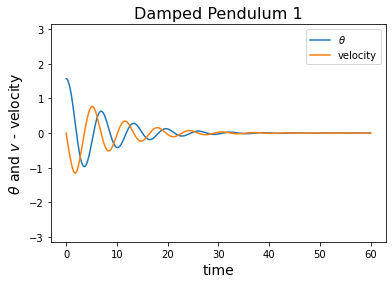

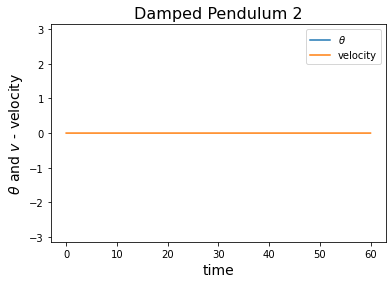

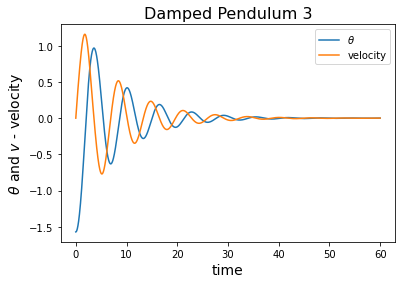

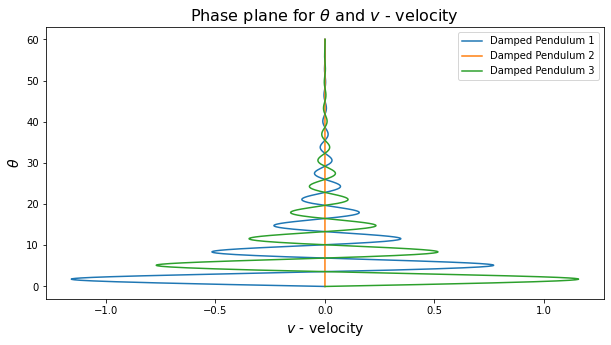

In [3]:
# --- Problem setup --- #

mu = 0.25
tf = 60
Nsteps = 3000
t = np.linspace(0, tf, Nsteps+1)

# --- Call the ODE solver and extract solutions for three different intitial conditions --- #

y_sol_1 = odeint(Pendulum, [np.pi/2, 0], t)
y_sol_2 = odeint(Pendulum, [2*np.pi, 0], t)
y_sol_3 = odeint(Pendulum, [np.pi/(-2),0], t)

# extract theta and vel from y
theta_1 = y_sol_1[:,0]
vel_1 = y_sol_1[:,1]
theta_2 = y_sol_2[:,0]
vel_2 = y_sol_2[:,1]
theta_3 = y_sol_3[:,0]
vel_3 = y_sol_3[:,1]

# --- Plot various interesting things --- #

# plot numerical solution 1
plt.plot(t, theta_1, label=r'$\theta$')
plt.plot(t, vel_1, label="velocity")

# labels etc
plt.ylim(-np.pi, np.pi)
plt.xlabel("time", fontsize=14)
plt.ylabel(r'$\theta$ and $v$ - velocity', fontsize=14)
plt.title("Damped Pendulum 1", fontsize=16)
plt.legend()
plt.show()        

# plot the numerical solution 2
plt.plot(t, theta_2, label=r'$\theta$')
plt.plot(t, vel_2, label="velocity")

# labels etc
plt.ylim(-np.pi, np.pi)
plt.xlabel("time", fontsize=14)
plt.ylabel(r'$\theta$ and $v$ - velocity', fontsize=14)
plt.title("Damped Pendulum 2", fontsize=16)
plt.legend()
plt.show()        

# plot the numerical solution 3
plt.plot(t, theta_3, label=r'$\theta$')
plt.plot(t, vel_3, label="velocity")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel(r'$\theta$ and $v$ - velocity', fontsize=14)
plt.title("Damped Pendulum 3", fontsize=16)
plt.legend()
plt.show()        

# Phase plane for time series and velocity
#x = np.sin(theta_3)
#y = -np.cos(theta_3)

# extract just some of the points using slicing
#x_points = x[:1000:10]
#y_points = y[:1000:10]

# plot (x,y) and the points
fig = plt.figure(figsize=(10,5))
plt.plot(vel_1, t, label="Damped Pendulum 1")
plt.plot(vel_2, t, label="Damped Pendulum 2")
plt.plot(vel_3, t, label="Damped Pendulum 3")
#plt.scatter(velDot0, thetaDot0,'or')

# labels etc
plt.xlabel(r'$v$ - velocity', fontsize=14)
plt.ylabel(r'$\theta$', fontsize=14)
plt.title(r'Phase plane for $\theta$ and $v$ - velocity', fontsize=16)
plt.legend()
plt.show()        

## Notes

- For <font color='orange'>pendulum 2</font>, with initial conditions velocity=0 and theta=2$\pi$, the pendulum would just hang there, which is why the graphs plots the constant function. It's not moving...